In [76]:
from jedi.inference import analysis
# Import required libraries
# For data manipulation
import pandas as pd
import numpy as np
# For plotting
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [77]:
#data = pd.read_csv("/Users/brocktbennett/GitHub/Project Data/2023_TAMU_competition_data/post_model_eda4real.csv")
data = pd.read_csv("/Users/nathanzlomke/Downloads/CORRECTED_model_data10-9.csv")

In [78]:
top20 = data[['tgt_ade_dc_ind','est_age', 'tot_drug_cost_accum_amt','Visit_Duration','sex_cd','Prescription_Filled_Duration','rx_cost','cms_low_income_ind','race_White','MedProcess_Duration','cms_disabled_ind','metric_strength','race_Hispanic','race_Black','race_asian','pay_day_supply_cnt','race_unknown','RX_Process_Duration','NPD_SUM','race_North American Native','ade_diagnosis']]

In [79]:
top20 = top20[top20['tgt_ade_dc_ind']==1]
top20.drop(columns='tgt_ade_dc_ind', inplace=True)


In [50]:
sampled_df = top20.sample(n=5000, replace=True)
sampled_df

,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,metric_strength,race_Hispanic,race_Black,race_asian,pay_day_supply_cnt,race_unknown,RX_Process_Duration,NPD_SUM,race_North American Native,ade_diagnosis
3050035,72,16758.0,-33.0,0,27.0,64.0,0,1,10.0,0,40,0,0,0,24.0,0,1.0,1.0,0,0
2872547,76,0.0,139.0,0,40.0,2.0,0,1,3.0,0,1,0,0,0,30.0,0,1.0,0.0,0,0
3861535,77,80102.0,15.0,0,118.0,15.0,1,1,12.0,0,40,0,0,0,30.0,0,1.0,4.0,0,0
1382218,77,333.0,-93.0,0,-71.0,59.0,1,1,20.0,0,10,0,0,0,90.0,0,1.0,6.0,0,0
2352028,71,13168.0,-26.0,0,-23.0,2012.0,0,0,14.0,0,120,0,1,0,30.0,0,1.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615457,72,0.0,93.0,1,121.0,10.0,1,0,8.0,0,0,0,0,1,90.0,0,1.0,1.0,0,0
2424402,52,2000.0,-18.0,1,-8.0,4.0,1,0,10.0,1,25,0,0,0,8.0,0,1.0,8.0,1,0
3051194,72,712.0,-14.0,0,-4.0,17.0,0,1,54.0,0,15,0,0,0,30.0,0,1.0,8.0,0,1
3642902,63,67121.0,70.0,0,68.0,32546.0,0,1,22.0,1,80,0,0,0,30.0,0,1.0,7.0,0,1


In [51]:
top20_trans = sampled_df.transpose()

In [9]:
top20_trans.info()

KeyboardInterrupt: 

In [110]:
data.dropna(inplace=True)
data = data[:].astype(int)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604010 entries, 0 to 608057
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Unnamed: 0                    604010 non-null  int64
 1   est_age                       604010 non-null  int64
 2   tot_drug_cost_accum_amt       604010 non-null  int64
 3   Visit_Duration                604010 non-null  int64
 4   sex_cd                        604010 non-null  int64
 5   Prescription_Filled_Duration  604010 non-null  int64
 6   rx_cost                       604010 non-null  int64
 7   cms_low_income_ind            604010 non-null  int64
 8   race_White                    604010 non-null  int64
 9   MedProcess_Duration           604010 non-null  int64
 10  cms_disabled_ind              604010 non-null  int64
 11  metric_strength               604010 non-null  int64
 12  race_Hispanic                 604010 non-null  int64
 13  race_Black         

In [80]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(top20)


In [81]:
chi_square_str = str(chi_square_value)
p_value_str = str(p_value)
print("Chi-Square Value:", chi_square_str)
print("P-value:", p_value_str)

Chi-Square Value: 4304443.20095067
P-value: 0.0


In [82]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(top20)

In [83]:
kmo_model

0.2932699728263572

In [87]:
data = data.drop('origin_label', axis=1)

KeyError: "['origin_label'] not found in axis"

In [85]:
pd.set_option('display.max_rows', 100)

top20.isnull().any()

est_age                         False
tot_drug_cost_accum_amt         False
Visit_Duration                  False
sex_cd                          False
Prescription_Filled_Duration    False
rx_cost                         False
cms_low_income_ind              False
race_White                      False
MedProcess_Duration             False
cms_disabled_ind                False
metric_strength                 False
race_Hispanic                   False
race_Black                      False
race_asian                      False
pay_day_supply_cnt              False
race_unknown                    False
RX_Process_Duration             False
NPD_SUM                         False
race_North American Native      False
ade_diagnosis                   False
dtype: bool

In [86]:
#Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
FA = FactorAnalyzer(rotation=None)
FA.fit(top20)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [87]:
#Get the loadings
loadings = FA.loadings_
loadings

array([[-2.53122093e-01,  1.12968921e-01, -4.62304790e-02],
       [-4.12196614e-01,  4.16130456e-01,  2.69858319e-01],
       [ 1.93654606e-01, -4.70705025e-01,  5.95086621e-01],
       [ 5.81175015e-01,  4.16427899e-01,  1.51165519e-01],
       [-5.05542172e-01,  4.51733899e-01,  6.38798447e-01],
       [-1.02752938e-01,  5.41213802e-02,  7.39179225e-02],
       [ 4.16786481e-01,  5.11923957e-01,  7.44561368e-02],
       [-2.41018926e-01, -7.21765456e-03,  1.97011368e-01],
       [-3.31255674e-01,  5.74718188e-01, -6.02126672e-01],
       [ 6.84544595e-01,  3.49111925e-01,  1.00465638e-01],
       [-6.13868159e-04, -2.98059838e-02, -1.47237518e-02],
       [-7.02880754e-02, -1.90215884e-01, -2.37601955e-01],
       [ 2.20073825e-01,  1.03892252e-01, -5.17283040e-02],
       [ 1.93349147e-02,  9.38647231e-02, -2.54295967e-02],
       [-4.36125278e-02,  4.04487708e-02, -4.95722167e-02],
       [ 2.29085904e-02, -8.69950312e-02, -4.07727582e-02],
       [ 1.22175696e-01, -2.30360497e-01

In [88]:
ev, v = FA.get_eigenvalues()
ev

array([2.3783199 , 2.12854885, 1.84965055, 1.62354358, 1.30792296,
       1.24610474, 1.16537398, 1.09167943, 1.02553561, 0.94751893,
       0.91796242, 0.87932341, 0.82120993, 0.76113629, 0.60407824,
       0.41805914, 0.28661367, 0.2509307 , 0.24179447, 0.05469321])

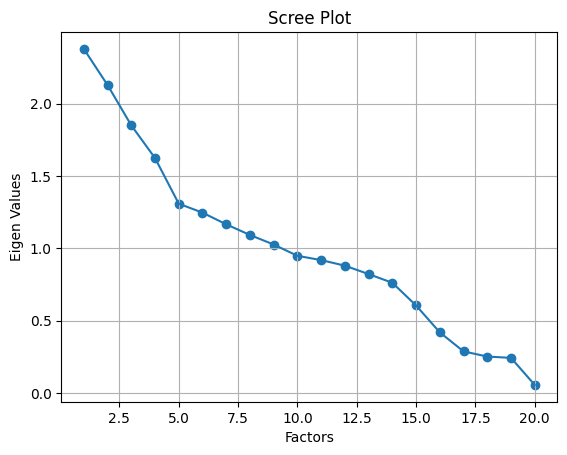

In [89]:
#Create scree plot
plt.scatter(range(1,top20.shape[1]+1),ev)
plt.plot(range(1,top20.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

In [90]:
#Use 10 factors for now...don't have an explanation for this
#Create factor analysis object and perform factor analysis
FA = FactorAnalyzer(n_factors=4, rotation='varimax')
FA.fit(top20)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [96]:
untransformed = FA.loadings_
untransformed.shape
untransformed = pd.DataFrame(untransformed)
untransformed

,0,1,2,3
0,-0.175385,0.166166,0.240385,-0.204736
1,-0.000900,0.201746,0.578051,0.129358
2,-0.040900,-0.748298,0.067674,-0.008493
3,0.695868,-0.044379,0.008527,-0.093759
4,-0.002424,-0.010756,0.926411,0.043967
5,-0.028032,0.017134,0.123328,0.035374
6,0.617298,0.111246,0.112969,-0.130503
7,-0.087094,-0.048063,0.167343,1.007158
8,0.007486,0.955417,0.031690,0.072561
9,0.836540,-0.073956,-0.177178,0.101964


In [98]:
untransformed.index = top20_trans.index.copy()
untransformed = abs(untransformed)

In [106]:
transformed_data = FA.transform(top20)
transformed_data.shape
transformed_data = pd.DataFrame(transformed_data)
transformed_data.shape
top20.join(transformed_data)

,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,...,pay_day_supply_cnt,race_unknown,RX_Process_Duration,NPD_SUM,race_North American Native,ade_diagnosis,0,1,2,3
4120,86,224.0,-68.0,1,-82.0,24.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,-0.615500,-0.110987,-0.501239,1.042025
4121,86,249.0,-68.0,1,-77.0,1.0,0,1,4.0,0,...,30.0,0,1.0,2.0,0,0,-0.651144,-0.082187,-1.110029,1.037302
4122,86,281.0,-68.0,1,-51.0,1.0,0,1,4.0,0,...,30.0,0,1.0,2.0,0,0,-0.643310,-0.088922,-0.980296,1.036158
4123,86,0.0,-68.0,1,-46.0,43.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,-0.597118,-0.110758,-0.068706,1.117950
4124,86,16250.0,-68.0,1,-32.0,50.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,-0.640843,-0.373326,-0.994054,0.775784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895792,91,16541.0,55.0,0,17.0,7.0,0,0,16.0,0,...,3.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895793,91,49585.0,55.0,0,99.0,31.0,0,0,16.0,0,...,70.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895794,91,1000.0,55.0,0,-48.0,11.0,0,0,16.0,0,...,13.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895795,91,0.0,55.0,0,-14.0,61.0,0,0,16.0,0,...,30.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN


In [71]:
transformed_data = pd.DataFrame(transformed_data)
transformed_data = abs(transformed_data)

In [34]:
#if factor loadings are <0.5, exclude
transformed_data[transformed_data < 0.5] = 0
#if factor loadings are >0.5, make binary flag indicator for easy filtering
transformed_data[transformed_data >= 0.5] = 1

In [35]:
transformed_data[:].astype(int)

,0,1,2,3,4,5
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,0,0,1,1
3,1,1,1,1,1,1
4,0,1,0,0,1,1
5,0,1,1,0,0,0
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,0,1,0,0,0,0
9,1,1,1,1,1,1


In [69]:
transformed_data.head()

,0,1,2,3
0,0.272316,0.277343,0.940397,1.588027
1,0.260479,0.307191,0.907210,1.485339
2,0.236531,0.331920,0.539990,1.462280
3,0.239154,0.311892,0.431906,1.555676
4,0.228260,0.306682,0.238245,1.569578


,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,...,pay_day_supply_cnt,race_unknown,RX_Process_Duration,NPD_SUM,race_North American Native,ade_diagnosis,0,1,2,3
4120,86,224.0,-68.0,1,-82.0,24.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,0.615500,0.110987,0.501239,1.042025
4121,86,249.0,-68.0,1,-77.0,1.0,0,1,4.0,0,...,30.0,0,1.0,2.0,0,0,0.651144,0.082187,1.110029,1.037302
4122,86,281.0,-68.0,1,-51.0,1.0,0,1,4.0,0,...,30.0,0,1.0,2.0,0,0,0.643310,0.088922,0.980296,1.036158
4123,86,0.0,-68.0,1,-46.0,43.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,0.597118,0.110758,0.068706,1.117950
4124,86,16250.0,-68.0,1,-32.0,50.0,0,1,4.0,0,...,90.0,0,1.0,2.0,0,0,0.640843,0.373326,0.994054,0.775784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895792,91,16541.0,55.0,0,17.0,7.0,0,0,16.0,0,...,3.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895793,91,49585.0,55.0,0,99.0,31.0,0,0,16.0,0,...,70.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895794,91,1000.0,55.0,0,-48.0,11.0,0,0,16.0,0,...,13.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN
3895795,91,0.0,55.0,0,-14.0,61.0,0,0,16.0,0,...,30.0,0,1.0,2.0,0,0,NaN,NaN,NaN,NaN


In [128]:
data[data['tgt_ade_dc_ind']==1].shape

(769179, 82)

In [129]:
from sklearn.preprocessing import StandardScaler
top20['tgt_ade_dc_ind']=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top20)
scaled_data = pd.DataFrame(scaled_data)
scaled_data = pd.DataFrame(data=scaled_data.values, columns=top20.columns)
scaled_data.head()

,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,...,race_Hispanic,race_Black,race_asian,pay_day_supply_cnt,race_unknown,RX_Process_Duration,NPD_SUM,race_North American Native,ade_diagnosis,tgt_ade_dc_ind
0,1.300656,-0.668958,-0.492429,1.338498,-1.346073,-0.314842,-0.852183,0.858339,-0.428458,-0.464952,...,-0.287618,-0.431563,-0.318629,1.879750,-0.196087,-0.164077,-0.604514,-0.146729,-0.330974,0.0
1,1.300656,-0.668168,-0.492429,1.338498,-1.267803,-0.319655,-0.852183,0.858339,-0.428458,-0.464952,...,-0.287618,-0.431563,-0.318629,-0.244713,-0.196087,-0.164077,-0.604514,-0.146729,-0.330974,0.0
2,1.300656,-0.667157,-0.492429,1.338498,-0.860798,-0.319655,-0.852183,0.858339,-0.428458,-0.464952,...,-0.287618,-0.431563,-0.318629,-0.244713,-0.196087,-0.164077,-0.604514,-0.146729,-0.330974,0.0
3,1.300656,-0.676039,-0.492429,1.338498,-0.782527,-0.310867,-0.852183,0.858339,-0.428458,-0.464952,...,-0.287618,-0.431563,-0.318629,1.879750,-0.196087,-0.164077,-0.604514,-0.146729,-0.330974,0.0
4,1.300656,-0.162370,-0.492429,1.338498,-0.563370,-0.309402,-0.852183,0.858339,-0.428458,-0.464952,...,-0.287618,-0.431563,-0.318629,1.879750,-0.196087,-0.164077,-0.604514,-0.146729,-0.330974,0.0


In [130]:
scaled_data = scaled_data.join(transformed_data)


In [131]:
scaled_data.to_csv("/Users/nathanzlomke/Downloads/train_with_factors.csv")
untransformed.to_csv("/Users/nathanzlomke/Downloads/factors.csv")

In [37]:
factored

,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,...,RX_Process_Duration,NPD_SUM,race_North American Native,ade_diagnosis,0,1,2,3,4,5
4120,86,224.0,-68.0,1,-82.0,24.0,0,1,4.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4121,86,249.0,-68.0,1,-77.0,1.0,0,1,4.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4122,86,281.0,-68.0,1,-51.0,1.0,0,1,4.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4123,86,0.0,-68.0,1,-46.0,43.0,0,1,4.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4124,86,16250.0,-68.0,1,-32.0,50.0,0,1,4.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895792,91,16541.0,55.0,0,17.0,7.0,0,0,16.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3895793,91,49585.0,55.0,0,99.0,31.0,0,0,16.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3895794,91,1000.0,55.0,0,-48.0,11.0,0,0,16.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3895795,91,0.0,55.0,0,-14.0,61.0,0,0,16.0,0,...,1.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
factored.columns

Index([                     'est_age',      'tot_drug_cost_accum_amt',
                     'Visit_Duration',                       'sex_cd',
       'Prescription_Filled_Duration',                      'rx_cost',
                 'cms_low_income_ind',                   'race_White',
                'MedProcess_Duration',             'cms_disabled_ind',
                    'metric_strength',                'race_Hispanic',
                         'race_Black',                   'race_asian',
                 'pay_day_supply_cnt',                 'race_unknown',
                'RX_Process_Duration',                      'NPD_SUM',
         'race_North American Native',                'ade_diagnosis',
                                    0,                              1,
                                    2,                              3,
                                    4,                              5,
                                    6,                              7,
      

In [72]:
variance = FA.get_factor_variance()

In [73]:
#This gives the cumulative variance
variance[2]
#0.374 or 37.4%
#This isn't great, but there is tradeoff with the amount of variables involved and not much gain for adding more variables.

array([0.08983243, 0.16990763, 0.24866001, 0.31906228])

In [162]:
factored.fillna(value=0, inplace=True)


In [158]:
factored.isnull().any()

est_age                         False
tot_drug_cost_accum_amt         False
Visit_Duration                  False
sex_cd                          False
Prescription_Filled_Duration    False
rx_cost                         False
cms_low_income_ind              False
race_White                      False
MedProcess_Duration             False
cms_disabled_ind                False
metric_strength                 False
race_Hispanic                   False
race_Black                      False
race_asian                      False
pay_day_supply_cnt              False
race_unknown                    False
RX_Process_Duration             False
NPD_SUM                         False
race_North American Native      False
ade_diagnosis                   False
0                               False
1                               False
2                               False
3                               False
4                               False
5                               False
6           

In [167]:
factored[factored[0]==1].head()

,est_age,tot_drug_cost_accum_amt,Visit_Duration,sex_cd,Prescription_Filled_Duration,rx_cost,cms_low_income_ind,race_White,MedProcess_Duration,cms_disabled_ind,...,ade_diagnosis,0,1,2,3,4,5,6,7,8
611917,94,158.0,-46.0,0,-61.0,9.0,1,0,69.0,0,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
611936,94,0.0,-46.0,0,21.0,12.0,1,0,69.0,0,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
611949,94,15897.0,-1.0,0,35.0,15968.0,1,0,78.0,0,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
611960,94,31868.0,-1.0,0,65.0,12.0,1,0,78.0,0,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
611963,94,31907.0,-1.0,0,56.0,2.0,1,0,78.0,0,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
factored.to_csv("/Users/nathanzlomke/Downloads/top20_factored_9.csv")